In [1]:
# importing basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))
import warnings
warnings.filterwarnings('ignore')

In C:\Users\gorcz\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gorcz\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gorcz\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\gorcz\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gorcz\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

pandas version: 0.25.1
numpy version: 1.16.5
seaborn version: 0.9.0


In [2]:
mall_data=pd.read_csv("Mall_Customers.csv")

In [3]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


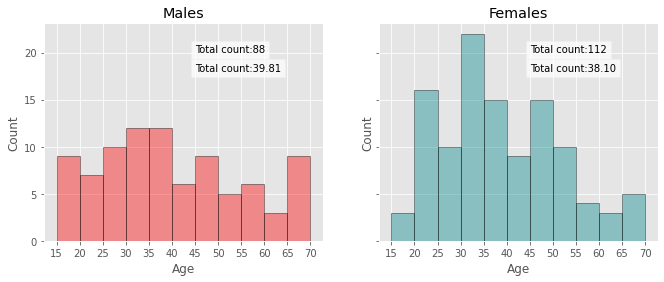

In [7]:
plt.style.use('ggplot')
males_age=mall_data[mall_data['Gender']=='Male']['Age']
females_age=mall_data[mall_data['Gender']=='Female']['Age']
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(11,4),sharey=True)

# codes are hex colors
bins=range(15,75,5)
sns.distplot(males_age,bins=bins,ax=ax1,kde=False,color='#FF0000', hist_kws=dict(edgecolor="k", linewidth=1))
ax1.set_xticks(bins)
ax1.set_ylabel('Count')
ax1.set_title('Males')
ax1.text(45,20,'Total count:{}'.format(males_age.count()),bbox=dict(facecolor='white', alpha=0.7))
ax1.text(45,18,'Total count:{:.2f}'.format(males_age.mean()),bbox=dict(facecolor='white', alpha=0.7))

sns.distplot(females_age,bins=bins,ax=ax2,kde=False, color='#00868b', hist_kws=dict(edgecolor="k", linewidth=1))
ax2.set_xticks(bins)
ax2.set_ylabel('Count')
ax2.set_title('Females')
ax2.text(45,20,'Total count:{}'.format(females_age.count()),bbox=dict(facecolor='white', alpha=0.7))
ax2.text(45,18,'Total count:{:.2f}'.format(females_age.mean()),bbox=dict(facecolor='white', alpha=0.7))

plt.show()

In [8]:
# differences between two samples
mall_data.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


In [9]:
stats.ks_2samp(males_age, females_age)

Ks_2sampResult(statistic=0.11525974025974026, pvalue=0.4870072659277531)

In [10]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


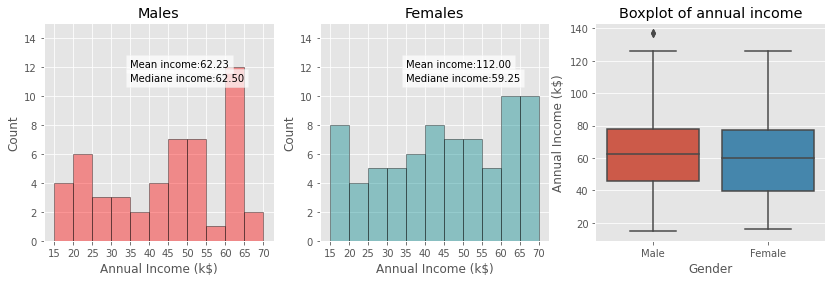

In [11]:
plt.style.use('ggplot')
males_income=mall_data[mall_data['Gender']=='Male']['Annual Income (k$)']
females_income=mall_data[mall_data['Gender']=='Female']['Annual Income (k$)']
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14,4))

# codes are hex colors
bins=range(15,75,5)
sns.distplot(males_income,bins=bins,ax=ax1,kde=False,color='#FF0000', hist_kws=dict(edgecolor="k", linewidth=1))
ax1.set_xticks(bins)
ax1.set_ylabel('Count')
ax1.set_ylim(0,15)
ax1.set_title('Males')
ax1.text(35,12,'Mean income:{:.2f}'.format(males_income.mean()),bbox=dict(facecolor='white', alpha=0.7))
ax1.text(35,11,'Mediane income:{:.2f}'.format(males_income.median()),bbox=dict(facecolor='white', alpha=0.7))

sns.distplot(females_income,bins=bins,ax=ax2,kde=False, color='#00868b', hist_kws=dict(edgecolor="k", linewidth=1))
ax2.set_xticks(bins)
ax2.set_ylabel('Count')
ax2.set_title('Females')
ax2.set_ylim(0,15)
ax2.text(35,12,'Mean income:{:.2f}'.format(females_income.count()),bbox=dict(facecolor='white', alpha=0.7))
ax2.text(35,11,'Mediane income:{:.2f}'.format(females_income.mean()),bbox=dict(facecolor='white', alpha=0.7))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

plt.show()

In [12]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


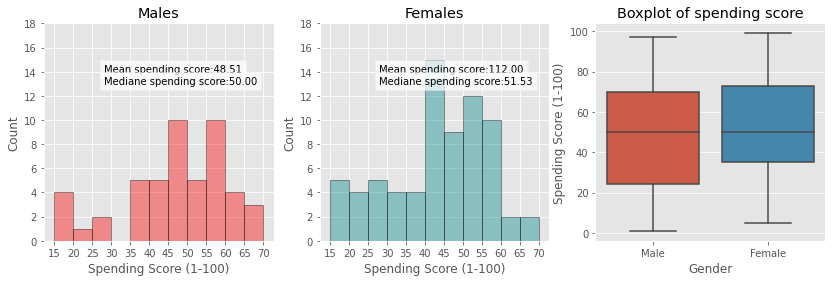

In [13]:
plt.style.use('ggplot')
males_spendings=mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)']
females_spendings=mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)']
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14,4))

# codes are hex colors
bins=range(15,75,5)
sns.distplot(males_spendings,bins=bins,ax=ax1,kde=False,color='#FF0000', hist_kws=dict(edgecolor="k", linewidth=1))
ax1.set_xticks(bins)
ax1.set_ylabel('Count')
ax1.set_ylim(0,18)
ax1.set_title('Males')
ax1.text(28,14,'Mean spending score:{:.2f}'.format(males_spendings.mean()),bbox=dict(facecolor='white', alpha=0.7))
ax1.text(28,13,'Mediane spending score:{:.2f}'.format(males_spendings.median()),bbox=dict(facecolor='white', alpha=0.7))

sns.distplot(females_spendings,bins=bins,ax=ax2,kde=False, color='#00868b', hist_kws=dict(edgecolor="k", linewidth=1))
ax2.set_xticks(bins)
ax2.set_ylabel('Count')
ax2.set_title('Females')
ax2.set_ylim(0,18)
ax2.text(28,14,'Mean spending score:{:.2f}'.format(females_spendings.count()),bbox=dict(facecolor='white', alpha=0.7))
ax2.text(28,13,'Mediane spending score:{:.2f}'.format(females_spendings.mean()),bbox=dict(facecolor='white', alpha=0.7))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [14]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spendings, females_spendings)[1]))

Kolgomorov-Smirnov test p-value: 0.29


In [15]:
age_bins=np.arange(15,75,5)
pd.cut(mall_data['Age'],bins=age_bins)

0      (15, 20]
1      (20, 25]
2      (15, 20]
3      (20, 25]
4      (30, 35]
         ...   
195    (30, 35]
196    (40, 45]
197    (30, 35]
198    (30, 35]
199    (25, 30]
Name: Age, Length: 200, dtype: category
Categories (11, interval[int64]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (50, 55] < (55, 60] < (60, 65] < (65, 70]]

In [16]:
mall_data.groupby(['Gender',pd.cut(mall_data['Age'],bins=age_bins)])['Age'].mean()

Gender  Age     
Female  (15, 20]    19.200000
        (20, 25]    22.600000
        (25, 30]    28.714286
        (30, 35]    32.782609
        (35, 40]    37.750000
        (40, 45]    43.333333
        (45, 50]    48.375000
        (50, 55]    53.000000
        (55, 60]    58.200000
        (60, 65]    64.000000
        (65, 70]    67.250000
Male    (15, 20]    19.000000
        (20, 25]    23.500000
        (25, 30]    27.900000
        (30, 35]    33.076923
        (35, 40]    38.250000
        (40, 45]    42.666667
        (45, 50]    47.900000
        (50, 55]    53.000000
        (55, 60]    58.714286
        (60, 65]    64.000000
        (65, 70]    68.000000
Name: Age, dtype: float64

In [17]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index=medians_by_age_group.index.set_names(['Gender','Age_bins'])
medians_by_age_group.reset_index(inplace=True)

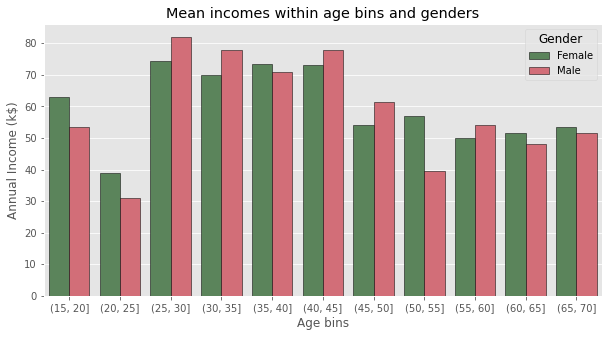

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Age_bins',y='Annual Income (k$)',data=medians_by_age_group,hue='Gender',palette=['#548b54','#e35d6a']
            ,edgecolor='k')
plt.title('Mean incomes within age bins and genders')
plt.xlabel('Age bins')
plt.show()

In [19]:
mall_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [20]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [21]:
X=mall_data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [22]:
ms=KMeans(2).fit(X)

In [23]:
silhouette_score(X,ms.labels_)

0.293166070535953

In [24]:
silhouette_scores=[]
inertias=[]
for i in range(2,15):
    kms=KMeans(i).fit(X)
    inertias.append(kms.inertia_)
    
    silhouette_scores.append(silhouette_score(X,kms.labels_))
    

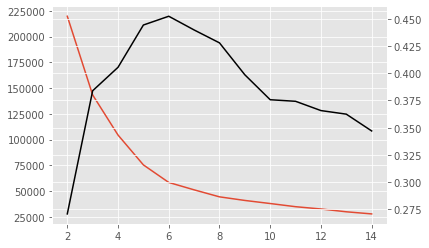

In [25]:
fig,ax=plt.subplots(1,1)

ax.plot(range(2,15),inertias)
ax2=ax.twinx()
ax2.plot(range(2,15),silhouette_scores,color='k')

In [26]:
kms=KMeans(6).fit(X)

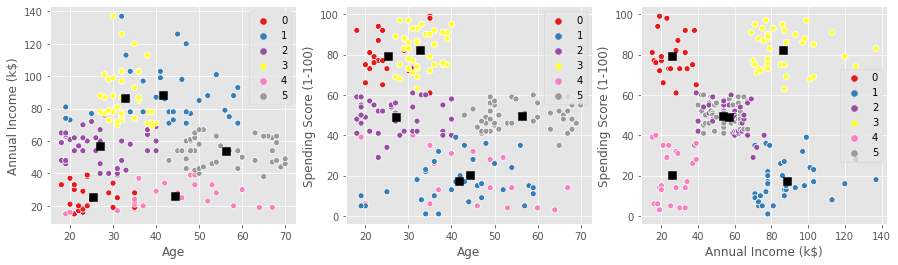

In [27]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))
lab=kms.labels_
sns.scatterplot(x='Age',y='Annual Income (k$)',data=mall_data,ax=ax1,hue=lab,palette='Set1',legend='full')
ax1.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,1],marker='s',s=50,c='k')

sns.scatterplot(x='Age',y='Spending Score (1-100)',data=mall_data,ax=ax2,hue=lab,palette='Set1',legend='full',c='b')
ax2.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,2],marker='s',s=50,c='k')

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_data,ax=ax3,hue=lab,palette='Set1',legend='full')
ax3.scatter(kms.cluster_centers_[:,1],kms.cluster_centers_[:,2],marker='s',s=50,c='k')
plt.show()

In [28]:
mall_data['kmcluster']=kms.labels_

In [29]:
mall_data.groupby('kmcluster').count()['Age']

kmcluster
0    22
1    35
2    38
3    39
4    22
5    44
Name: Age, dtype: int64

In [30]:
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [31]:
from sklearn.cluster import DBSCAN
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigate

params=list(product(eps_values,min_samples))

silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [32]:
silhouette_scores=[]
for p in params:
    dbscan=DBSCAN(eps=p[0],min_samples=p[1]).fit(X)
    silhouette_scores.append(silhouette_score(X,dbscan.labels_))

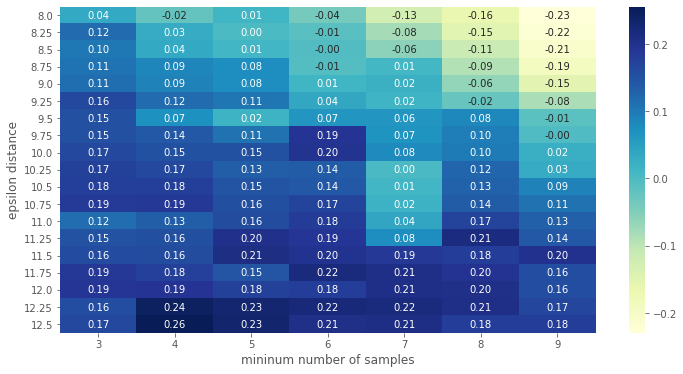

In [33]:
x=np.array(silhouette_scores).reshape(eps_values.shape[0],min_samples.shape[0])

fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(x,yticklabels=eps_values,xticklabels=min_samples,fmt='.2f',annot=True,annot_kws={"size": 10}, cmap="YlGnBu",ax=ax)
ax.set_xlabel('mininum number of samples')
ax.set_ylabel('epsilon distance')
plt.show()

In [34]:
dbscan=DBSCAN(eps=4,min_samples=12.5).fit(X)

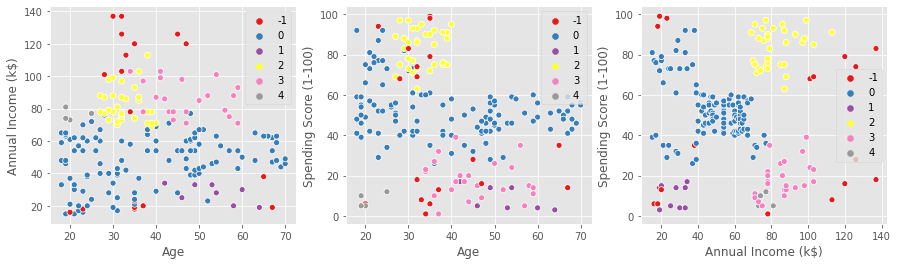

In [35]:
dbscan=DBSCAN(eps=12.5,min_samples=4).fit(X)

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))
lab=dbscan.labels_
sns.scatterplot(x='Age',y='Annual Income (k$)',data=mall_data,ax=ax1,hue=lab,palette='Set1',legend='full')
#ax1.scatter(dbscan.cluster_centers_[:,0],dbscan.cluster_centers_[:,1],marker='s',s=50,c='k')

sns.scatterplot(x='Age',y='Spending Score (1-100)',data=mall_data,ax=ax2,hue=lab,palette='Set1',legend='full',c='b')
#ax2.scatter(dbscan.cluster_centers_[:,0],dbscan.cluster_centers_[:,2],marker='s',s=50,c='k')

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_data,ax=ax3,hue=lab,palette='Set1',legend='full')
#ax3.scatter(dbscan.cluster_centers_[:,1],dbscan.cluster_centers_[:,2],marker='s',s=50,c='k')
plt.show()

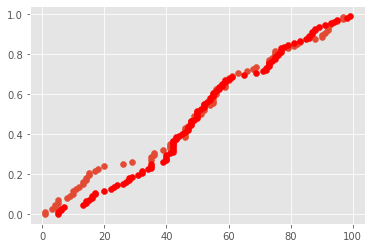

In [36]:
plt.scatter(np.sort(males_spendings),np.array(range(males_spendings.shape[0]))/float(males_spendings.shape[0]))
plt.scatter(np.sort(females_spendings),np.array(range(females_spendings.shape[0]))/float(females_spendings.shape[0]),color='r')
#plt.scatter(np.sort(x),np.array(range(N))/float(N))

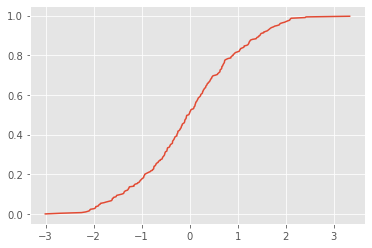

In [37]:
N = 300
Z = np.random.normal(size = N)
# method 1
H,X1 = np.histogram( Z, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

#plt.plot(X1[1:], F1)
plt.plot(X2, F2)
plt.show()

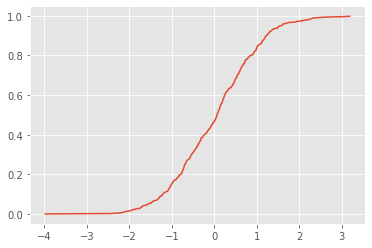

In [39]:
N = 500
Z = np.random.normal(size = N)
# method 1
H,X1 = np.histogram( Z, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

#plt.plot(X1[1:], F1)
plt.plot(X2, F2)
plt.show()